# "Mouse" labeled example

This notebook walks through an example with the manually labeled contexts for the word "mouse."

In [1]:
from contexts import *
from transformembeddings import *
from vizembeddings import *
%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be

In [2]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [3]:
# database with Wikipedia corpus
database_path = 'sqlite:///../embed_wiki_data/wikidb.db'

# fastText precomputed vectors
ft_path = "../embed_wiki_data/wiki.en.bin"

# pretrained BERT model
bert_path = "uncased_L-12_H-768_A-12/"

In [4]:
engine = create_engine(database_path)

session = sessionmaker()
session.configure(bind=engine)
s = session()

# Load labeled data

In [5]:
labeled = LabeledContexts("mouse_labeled_example/mouse_coded_200.json",
                                   context_data = {
                                       "word": "mouse",
                                       "context_type": "sentence",
                                       "window_size": None,
                                       "randomized": False,
                                   }
                                  )

# Let's inspect the data


## Last 20 examples


In [6]:
labeled.contexts[-20:]

['Crusio showed that about 50% of the variation found between different inbred mouse strains in the sizes of their IIPMF were due to genetic differences.',
 'He and his co-editors developed standards for the publication of mouse mutant studies for this journal.',
 'In Heidelberg, Crusio became interested in the inheritance of variations in the neuroanatomy of the mouse hippocampus.',
 'A good mouse model for the Fragile X syndrome is available because there are mice in which the "Fmr1" gene has been changed so that it does not work any more.',
 'Injecting mouse pups with thyroxine results in larger IIPMF projections.',
 'Then one mouse asks who will volunteer to put the bell on the cat?',
 "Several species of native mammals including echidnas, the Ooldea dunnart, kultarr, red kangaroo, eastern wallaroo, Gould's wattled bat, lesser long-eared bat, spinifex hopping mouse, sandy inland mouse and dingos have been recorded on the Angas Downs.",
 'Engelbart was known for inventing the comput

## The manually assigned labels

### 0 = computer device
### 1 = animal

In [7]:
labeled.true_labels[-20:]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Computing vector representations for each model

In [8]:
# fastText
ft = ContextEmbeddings(labeled, 
                                tf_idf_weighting = True, 
                                mask_pct = None, 
                                exclude_word = False
                           )

# ft.extract_embeddings("fastText",
#                               ft_path = ft_path)

# ft.pickle_embeddings("mouse_labeled_example/ft_mouse.pkl") 

# after extracting the embeddings and pickling them, they can be loaded from a file
ft.extract_embeddings("fastText",
                              use_pkl = True,
                              pkl_path = "mouse_labeled_example/ft_mouse.pkl")

# ELMo
elmo = ContextEmbeddings(labeled, 
                                tf_idf_weighting = True, 
                                mask_pct = None, 
                                exclude_word = False
                           )

# elmo.extract_embeddings("ELMO")

# elmo.pickle_embeddings("mouse_labeled_example/elmo_mouse.pkl")

# after extracting the embeddings and pickling them, they can be loaded from a file
elmo.extract_embeddings("fastText",
                              use_pkl = True,
                              pkl_path = "mouse_labeled_example/elmo_mouse.pkl")

# BERT
bert = ContextEmbeddings(labeled, 
                                tf_idf_weighting = True, 
                                mask_pct = None, 
                                exclude_word = False
                           )

# bert.extract_embeddings("BERT",
#                              bert_path = bert_path
#                               )

# bert.pickle_embeddings("mouse_labeled_example/bert_mouse.pkl")

# after extracting the embeddings and pickling them, they can be loaded from a file
bert.extract_embeddings("BERT",
                              use_pkl = True,
                              pkl_path = "mouse_labeled_example/bert_mouse.pkl")

# Inspecting the representations: ELMo

As an example, we will inspect the ELMo representations (the other cases are analogous).

In [9]:
elmo.embedding_representation.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.000443,0.000699,-0.001278,-0.001169,0.001374,-0.000338,0.000036,0.000252,-0.000591,-0.000845,...,-0.001754,0.002447,-0.000618,0.002898,-0.000687,0.001004,0.005076,-0.000021,-0.000230,0.000596
1,-0.000741,-0.000606,-0.000503,-0.000568,0.000330,-0.000696,-0.000036,0.002158,-0.001493,-0.000784,...,-0.000848,0.001516,-0.001223,0.001910,-0.000303,0.000261,0.001873,0.000477,0.000607,0.000468
2,0.000181,0.002019,-0.001354,0.000197,0.000318,-0.000173,0.001188,0.000820,-0.000673,-0.000235,...,-0.001605,0.000476,0.000274,0.002060,-0.000663,0.000386,0.004706,0.000562,-0.000258,-0.000290
3,0.000088,0.001303,-0.000893,-0.000410,0.000723,-0.000008,0.001355,0.002666,-0.001133,-0.000296,...,-0.001787,0.002365,0.000957,0.002027,-0.000102,0.000384,0.005083,0.000480,0.000636,-0.000364
4,0.000530,0.001783,-0.001024,-0.000588,0.000272,-0.000953,-0.000847,0.001768,-0.001498,-0.000190,...,-0.001874,0.002669,-0.000005,0.002447,-0.001147,0.000555,0.003665,0.000707,0.001139,0.002392


# Visualizations

Now, let's visualize the labeled data.

# fastText, PCA

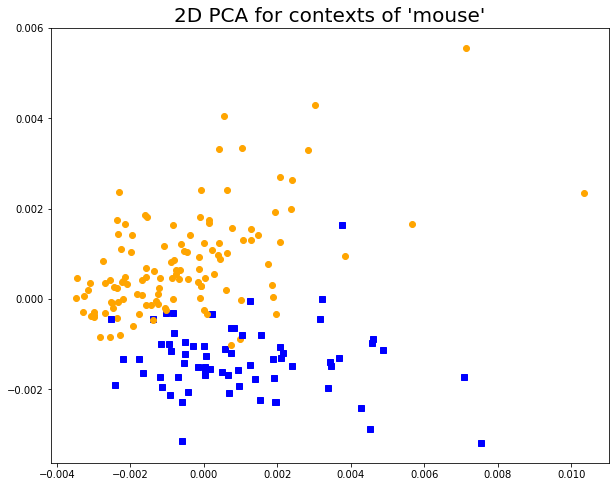

In [10]:
ft.decompose_embeddings("PCA", 2)

plot_labeled_data(ft)

## As an aside, let's look at the decomposed representations

In [11]:
# first 10 observations
ft.decomposed_embedding_representation[:10]

array([[ 2.0748482e-03, -1.0697973e-03],
       [-8.4413681e-04, -3.1653469e-04],
       [-7.1337936e-04, -1.7194505e-03],
       [ 9.5076207e-04, -1.9227032e-03],
       [ 3.6944456e-03, -1.2977165e-03],
       [-2.9391807e-04, -1.0518028e-03],
       [ 3.1567214e-03, -4.3410019e-04],
       [ 1.9683950e-03, -2.2748774e-03],
       [-1.5442273e-06, -1.0413559e-03],
       [-5.1353243e-04, -9.4355666e-04]], dtype=float32)

# BERT, UMAP

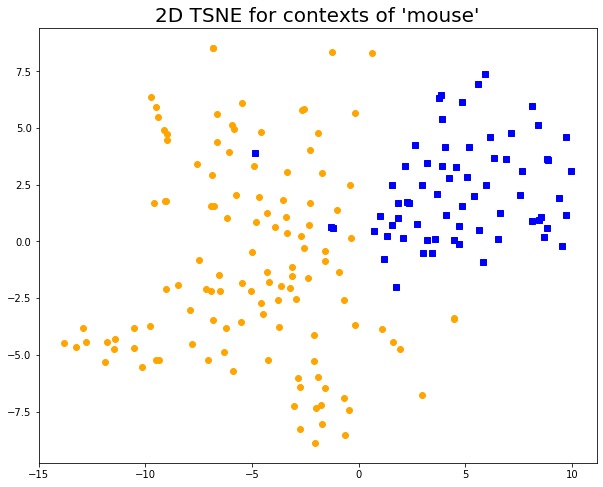

In [12]:
bert.decompose_embeddings("TSNE", 2)

plot_labeled_data(bert)

# ELMo, PCA

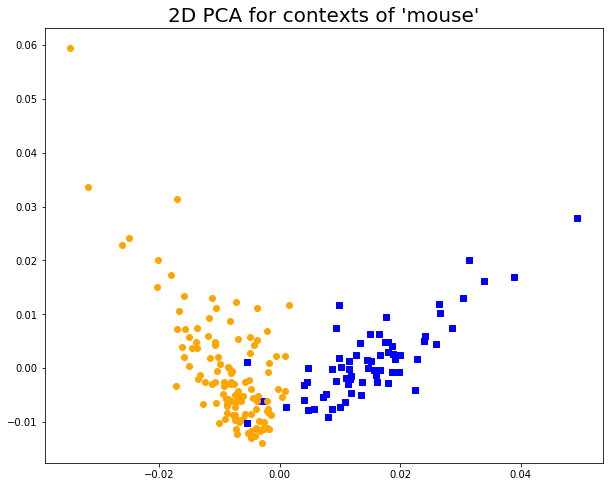

In [13]:
elmo.decompose_embeddings("PCA", 2)

plot_labeled_data(elmo)